In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from datetime import date

In [3]:
import pickle

# reading a pickle file
with open('../data/teis_final_data.pickle', 'rb') as file:
    final_data = pickle.load(file)

In [4]:
final_data

,Child ID,DOB,Notification Date,Referral Age,Referral Source Type Name,Child Phase,Exit Reason,Exit Date,Exit Age,Service Coordinator,...,POE,County Name,County SES,Tenn Region,Fiscal Year,Fiscal Year.1,Notification Month,Qtr,Notification Year,Active
0,104085,2007-07-07,2018-01-20,3850 days,DCS,Notification,Unable to contact,2010-01-25,933 days,NaN,...,GN,Davidson,Competitive,Middle,2017-2018,2017.0,Jan,3.0,2018,I
1,350065,2013-10-15,2016-08-17,1037 days,PCP,Screening,Unable to contact,2016-08-31,1051 days,Steven Scarlett,...,UC,Jackson,At-Risk,Middle,2016-2017,2016.0,Aug,1.0,2016,I
2,351755,2013-11-13,2016-07-12,972 days,Parent,Eligibility,Ineligible for Part C,2016-08-25,1016 days,Rene Bard,...,NW,Madison,Transitional,Western,2016-2017,2016.0,Jul,1.0,2016,I
3,353800,2013-10-01,2016-09-14,1079 days,Parent,Notification,Referral less than 45 days,2016-09-15,1080 days,Jennifer Terranera - 45 days,...,FT,Hawkins,At-Risk,Eastern,2016-2017,2016.0,Sep,1.0,2016,I
4,353805,2013-12-04,2016-08-05,975 days,Dept. of Health,IFSP,618 - Part B eligibility not determined,2016-12-03,1095 days,Anna Bolin,...,UC,Putnam,Transitional,Middle,2016-2017,2016.0,Aug,1.0,2016,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115519,531592,2020-05-20,2022-07-01,772 days,PCP,Notification,NaN,NaT,NaT,Kim Correll,...,GN,Montgomery,Transitional,NaN,NaN,NaN,NaN,NaN,2022,A
115520,531593,2021-12-07,2022-07-01,206 days,PCP,Notification,NaN,NaT,NaT,Kim Correll,...,GN,Davidson,Competitive,NaN,NaN,NaN,NaN,NaN,2022,A
115521,531594,2022-06-21,2022-07-01,10 days,Other Health Care Provider,Notification,NaN,NaT,NaT,Kim Correll,...,GN,Montgomery,Transitional,NaN,NaN,NaN,NaN,NaN,2022,A
115522,531595,2022-06-17,2022-07-01,14 days,Hospital,Notification,NaN,NaT,NaT,Kim Correll,...,GN,Davidson,Competitive,NaN,NaN,NaN,NaN,NaN,2022,A


In [5]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115523 entries, 0 to 115523
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype          
---  ------                     --------------   -----          
 0   Child ID                   115523 non-null  int64          
 1   DOB                        115523 non-null  datetime64[ns] 
 2   Notification Date          115523 non-null  datetime64[ns] 
 3   Referral Age               115523 non-null  timedelta64[ns]
 4   Referral Source Type Name  115523 non-null  object         
 5   Child Phase                115523 non-null  object         
 6   Exit Reason                96176 non-null   object         
 7   Exit Date                  85193 non-null   datetime64[ns] 
 8   Exit Age                   85193 non-null   timedelta64[ns]
 9   Service Coordinator        115522 non-null  object         
 10  Parent Consent             75364 non-null   datetime64[ns] 
 11  Initial Eligibility        71883 non-nu

In [6]:
teis_q3 = final_data[['DOB', 'Referral Source Type Name', 'County SES', 'POE', 'Notification Date', 'Initial IFSP Date']]
teis_q3

,DOB,Referral Source Type Name,County SES,POE,Notification Date,Initial IFSP Date
0,2007-07-07,DCS,Competitive,GN,2018-01-20,NaN
1,2013-10-15,PCP,At-Risk,UC,2016-08-17,NaN
2,2013-11-13,Parent,Transitional,NW,2016-07-12,NaN
3,2013-10-01,Parent,At-Risk,FT,2016-09-14,NaN
4,2013-12-04,Dept. of Health,Transitional,UC,2016-08-05,10/10/2016
...,...,...,...,...,...,...
115519,2020-05-20,PCP,Transitional,GN,2022-07-01,NaN
115520,2021-12-07,PCP,Competitive,GN,2022-07-01,NaN
115521,2022-06-21,Other Health Care Provider,Transitional,GN,2022-07-01,NaN
115522,2022-06-17,Hospital,Competitive,GN,2022-07-01,NaN


* Some areas of potential concern are POEs having a low proportion of referrals, a high average age of referrals, a low percent of total referrals resulting in an IFSP or a lower percent of eligible referrals resulting in an IFSP. How do POEs compare on these metrics, and which POEs are of concern on the basis of one or more of the listed criteria?

* Look for patterns in referrals and re-referrals on the basis of the following:
    - Age
    - Referral source
    - Socioeconomic status (County SES)

In [7]:
teis_q3["Notification age"] = teis_q3['Notification Date']- teis_q3['DOB']

/var/folders/fw/vny6qk710md1z_8_fl2jrzdm0000gn/T/ipykernel_5763/1389747787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teis_q3["Notification age"] = teis_q3['Notification Date']- teis_q3['DOB']


In [8]:
teis_q3

,DOB,Referral Source Type Name,County SES,POE,Notification Date,Initial IFSP Date,Notification age
0,2007-07-07,DCS,Competitive,GN,2018-01-20,NaN,3850 days
1,2013-10-15,PCP,At-Risk,UC,2016-08-17,NaN,1037 days
2,2013-11-13,Parent,Transitional,NW,2016-07-12,NaN,972 days
3,2013-10-01,Parent,At-Risk,FT,2016-09-14,NaN,1079 days
4,2013-12-04,Dept. of Health,Transitional,UC,2016-08-05,10/10/2016,975 days
...,...,...,...,...,...,...,...
115519,2020-05-20,PCP,Transitional,GN,2022-07-01,NaN,772 days
115520,2021-12-07,PCP,Competitive,GN,2022-07-01,NaN,206 days
115521,2022-06-21,Other Health Care Provider,Transitional,GN,2022-07-01,NaN,10 days
115522,2022-06-17,Hospital,Competitive,GN,2022-07-01,NaN,14 days


In [9]:
teis_q3['Initial IFSP Date'] = pd.to_datetime(teis_q3['Initial IFSP Date'])

/var/folders/fw/vny6qk710md1z_8_fl2jrzdm0000gn/T/ipykernel_5763/3527592537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teis_q3['Initial IFSP Date'] = pd.to_datetime(teis_q3['Initial IFSP Date'])


In [10]:
teis_q3["ifsp_age"] = teis_q3['Initial IFSP Date']- teis_q3['DOB']

/var/folders/fw/vny6qk710md1z_8_fl2jrzdm0000gn/T/ipykernel_5763/2916790454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teis_q3["ifsp_age"] = teis_q3['Initial IFSP Date']- teis_q3['DOB']


In [11]:
teis_q3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115523 entries, 0 to 115523
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype          
---  ------                     --------------   -----          
 0   DOB                        115523 non-null  datetime64[ns] 
 1   Referral Source Type Name  115523 non-null  object         
 2   County SES                 115519 non-null  object         
 3   POE                        115523 non-null  object         
 4   Notification Date          115523 non-null  datetime64[ns] 
 5   Initial IFSP Date          45519 non-null   datetime64[ns] 
 6   Notification age           115523 non-null  timedelta64[ns]
 7   ifsp_age                   45519 non-null   timedelta64[ns]
dtypes: datetime64[ns](3), object(3), timedelta64[ns](2)
memory usage: 7.9+ MB


In [12]:
POE_avg_notification_age = teis_q3.groupby(['POE'])['Notification age'].mean().to_frame().reset_index()

In [13]:
POE_avg_notification_age = POE_avg_notification_age.rename(columns = {'Notification age':'Avg_notification_age'})
POE_avg_notification_age

,POE,Avg_notification_age
0,ET,451 days 21:59:19.073021424
1,FT,426 days 10:55:31.627701808
2,GN,502 days 13:14:23.224467608
3,MD,469 days 00:53:47.572133096
4,NW,429 days 02:57:09.611650488
5,SC,518 days 18:53:22.405291640
6,SE,436 days 22:00:24.573378840
7,SW,438 days 22:04:38.997069360
8,UC,473 days 18:04:07.953216376


In [14]:
POE_avg_notification_age['Avg_notification_age'] = POE_avg_notification_age['Avg_notification_age'].dt.days
POE_avg_notification_age

,POE,Avg_notification_age
0,ET,451
1,FT,426
2,GN,502
3,MD,469
4,NW,429
5,SC,518
6,SE,436
7,SW,438
8,UC,473


df['Discount'] = pd.to_numeric(df['Discount'])

In [15]:
POE_avg_notification_age['Avg_notification_age'] = pd.to_numeric(POE_avg_notification_age['Avg_notification_age'])
POE_avg_notification_age

,POE,Avg_notification_age
0,ET,451
1,FT,426
2,GN,502
3,MD,469
4,NW,429
5,SC,518
6,SE,436
7,SW,438
8,UC,473


In [23]:
POE_avg_notification_age['Avg_age_months'] = POE_avg_notification_age['Avg_notification_age']*0.032855
POE_avg_notification_age

,POE,Avg_notification_age,Avg_age_months
0,ET,451,14.817605
1,FT,426,13.996230
2,GN,502,16.493210
3,MD,469,15.408995
4,NW,429,14.094795
5,SC,518,17.018890
6,SE,436,14.324780
7,SW,438,14.390490
8,UC,473,15.540415


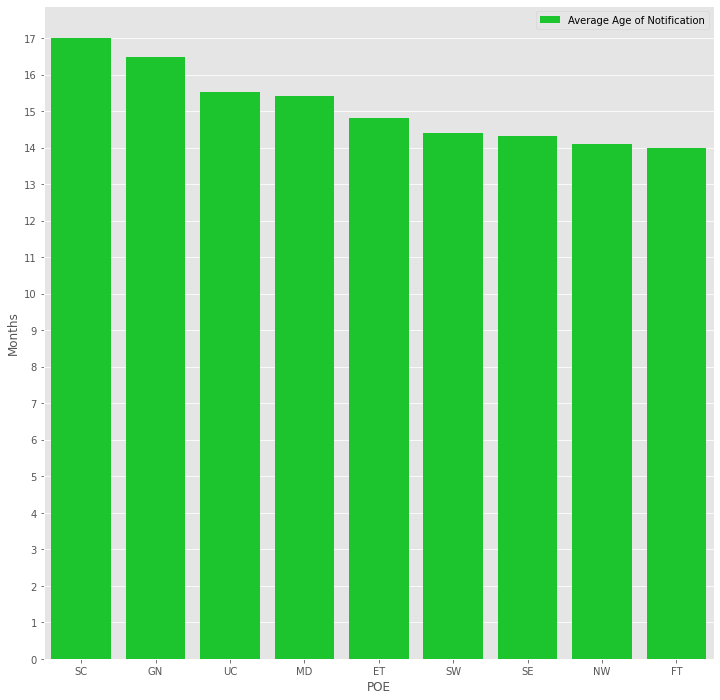

In [37]:
fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(x = POE_avg_notification_age.POE, y = POE_avg_notification_age.Avg_age_months,
            label='Average Age of Notification',
            color='#00E117', order=POE_avg_notification_age.sort_values('Avg_age_months',ascending=False)['POE']
           )
plt.legend()
plt.style.use('ggplot')
plt.ylabel('Months')
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]);

In [18]:
IFSP = final_data.groupby(['POE','Child Phase'])['Child ID'].count().to_frame().reset_index()
IFSP

,POE,Child Phase,Child ID
0,ET,Eligibility,5544
1,ET,Evaluation,624
2,ET,IFSP,7628
3,ET,Notification,6275
4,ET,Referral,246
5,ET,Screening,266
6,FT,Eligibility,2789
7,FT,Evaluation,303
8,FT,IFSP,4727
9,FT,Notification,3444


In [19]:
IFSP = IFSP.rename(columns = {'Child ID':'Count'})
IFSP

,POE,Child Phase,Count
0,ET,Eligibility,5544
1,ET,Evaluation,624
2,ET,IFSP,7628
3,ET,Notification,6275
4,ET,Referral,246
5,ET,Screening,266
6,FT,Eligibility,2789
7,FT,Evaluation,303
8,FT,IFSP,4727
9,FT,Notification,3444


In [20]:
IFSP['Total Children'] = IFSP.groupby('POE')['Count'].transform(sum)
IFSP

,POE,Child Phase,Count,Total Children
0,ET,Eligibility,5544,20583
1,ET,Evaluation,624,20583
2,ET,IFSP,7628,20583
3,ET,Notification,6275,20583
4,ET,Referral,246,20583
5,ET,Screening,266,20583
6,FT,Eligibility,2789,11335
7,FT,Evaluation,303,11335
8,FT,IFSP,4727,11335
9,FT,Notification,3444,11335


In [21]:
IFSP['Percent of Total'] = IFSP.Count/IFSP['Total Children']*100
IFSP

,POE,Child Phase,Count,Total Children,Percent of Total
0,ET,Eligibility,5544,20583,26.934849
1,ET,Evaluation,624,20583,3.031628
2,ET,IFSP,7628,20583,37.059709
3,ET,Notification,6275,20583,30.486324
4,ET,Referral,246,20583,1.195161
5,ET,Screening,266,20583,1.292329
6,FT,Eligibility,2789,11335,24.605205
7,FT,Evaluation,303,11335,2.673136
8,FT,IFSP,4727,11335,41.702691
9,FT,Notification,3444,11335,30.383767


In [22]:
IFSP = IFSP.loc[IFSP['Child Phase']=='IFSP']
IFSP

,POE,Child Phase,Count,Total Children,Percent of Total
2,ET,IFSP,7628,20583,37.059709
8,FT,IFSP,4727,11335,41.702691
14,GN,IFSP,7499,20239,37.052226
20,MD,IFSP,6077,17641,34.448161
26,NW,IFSP,2101,6592,31.871966
32,SC,IFSP,7011,14967,46.843055
38,SE,IFSP,3426,8790,38.976109
44,SW,IFSP,2516,6142,40.963855
50,UC,IFSP,4533,9234,49.090318
